# Example 9.3: Dual Cycle (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

A Dual cycle with intake conditions of $300\ \text{K}$ and $1\ \text{bar}$ has a compression ratio of $10$, a maximum pressure of $50\ \text{bar}$ and a maximum temperature of $2000\ \text{K}$.  Using a **cold-air-standard analysis**, find the cutoff ratio, net work output (kJ/kg), heat input, and cycle efficiency  

* (a) $p$-$v$ diagram
* (b) $T$-$s$ diagram
* (c) $T$,$p$ at each state
* (d) $r_c$
* (e) $q_{in}$
* (f) $w_{net}$
* (g) $\eta_{th}$
* (h) $\text{MEP}$

## Solution
 
__[Video Explanation](https://uky.yuja.com/V/Video?v=3074248&node=10465176&a=1136783553&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_K import *
air = idealgas.Properties('Air',unit_system='kSI_K')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(300,'K')  # Inlet Temperature
p[1] = Quantity(1,'bar')  # Inlet pressure
r = Quantity(10,'')       # Compression ratio
p_max = Quantity(50,'bar')# Max pressure
T_max = Quantity(2000,'K')# Max Temperature

Summary();

<IPython.core.display.Latex object>

,T,p
unit,K,kPa
1,300,100.0


### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Maximum pressure occurs at states 3 and 4
- Maximum temperature occurs at state 4
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
%%showcalc
# Ideal Gas
R = air.R

# Constant thermal properties evaluated at room temperature
T_room = Quantity(25,'degC')
c_v = air.Cv(T=T_room)
c_p = air.Cp(T=T_room)
k = air.k(T=T_room)

# Maximum temperature and pressure
p[3] = p_max
p[4] = p_max
T[4] = T_max

 Ideal Gas

<IPython.core.display.Latex object>

 Constant thermal properties evaluated at room temperature

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Maximum temperature and pressure

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (c) $T$ and $p$

In [15]:
#%%showcalc
# 1-2) Isentropy compression: Isentropic Ideal Gas Relations
T[2] = T[1]*r**(k-1)
p[2] = p[1]*r**k

# 2-3) Constant volume heat addition: Ideal Gas law at both states
T[3] = T[2]*p[3]/p[2]

# 3-4) Constant pressure heat addition: We already know $T_4$ and $p_4$

# 4-5) Isentropic Expansion: Isentropic Ideal Gas Relations
v[1] = R*T[1]/p[1]
v[5] = v[1]
v[4] = R*T[4]/p[4]
T[5] = T[4]*(v[4]/v[5])**(k-1)
p[5] = R*T[5]/v[5]
Calculations()

 1-2) Isentropy compression: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 2-3) Constant volume heat addition: Ideal Gas law at both states

<IPython.core.display.Latex object>

 3-4) Constant pressure heat addition: We already know $T_4$ and $p_4$

 4-5) Isentropic Expansion: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
states.display();

,T,p,v
unit,K,kPa,m³/kg
1,300.000000,100.000000,0.861158
2,753.521630,2511.738765,-
3,1500.000000,5000.000000,-
4,2000.000000,5000.000000,0.114821
5,893.362734,297.787578,0.861158


#### (b) Cut-off ratio

In [6]:
%%showcalc
v[3] = R*T[3]/p[3]
r_c = v[4]/v[3]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (c) Heat input

In [7]:
%%showcalc
# 1st Law 2$\to$3
q_2_to_3 = c_v*(T[3]-T[2])

# 1st Law 3$\to$4
q_3_to_4 = c_p*(T[4]-T[3])

# Total heat input
q_in = q_2_to_3 + q_3_to_4 

 1st Law 2$\to$3

<IPython.core.display.Latex object>

 1st Law 3$\to$4

<IPython.core.display.Latex object>

 Total heat input

<IPython.core.display.Latex object>

#### (d) $w_{net}$

In [8]:
%%showcalc
# 1st Law 5$\to$1
q_5_to_1 = c_v*(T[1]-T[5])
q_out = -q_5_to_1

# 1st Law Full Cycle
w_net = q_in-q_out

 1st Law 5$\to$1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 1st Law Full Cycle

<IPython.core.display.Latex object>

#### (e) $\eta_{th}$

In [9]:
%%showcalc
# Thermal efficiency
eta_th = w_net/q_in

 Thermal efficiency

<IPython.core.display.Latex object>

#### (f) MEP

In [10]:
%%showcalc
# Mean Effective Pressure
v_max = v[1]
v[2] = v[3]
v_min = v[2]
MEP = w_net/(v_max-v_min)

 Mean Effective Pressure

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Plotting
*Note: The plotting library uses the property tables to draw the process paths, which inherently assumes variable specific heat (i.e. real-fluid or air-standard assumptions).  If the library is used to draw process paths between states that were obtained using constant specific heat (cold-air-standard assumptions) there will be inconsistencies between the state points and the process paths.*

In order to plot the paths of the cycle on the $p$-$v$ diagram and states on the $T$-$s$ diagram, we need discrete values for the specifc enthalpy and entropy at each state rather than just the changes in properties we calculated above.  To do this we can pick an arbritrary value for the enthalpy and entropy at any state, then caclulate the enthalpy and entropy at the rest of the states relative to the reference point. For this case, we will look up the properties from the tables for state 1 and use that as our starting point.

#### (a) $p$-$v$
Note: the isentropic lines do not line up exactly with the states in this diagram because the entropies were calculated for variable specific heat, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  

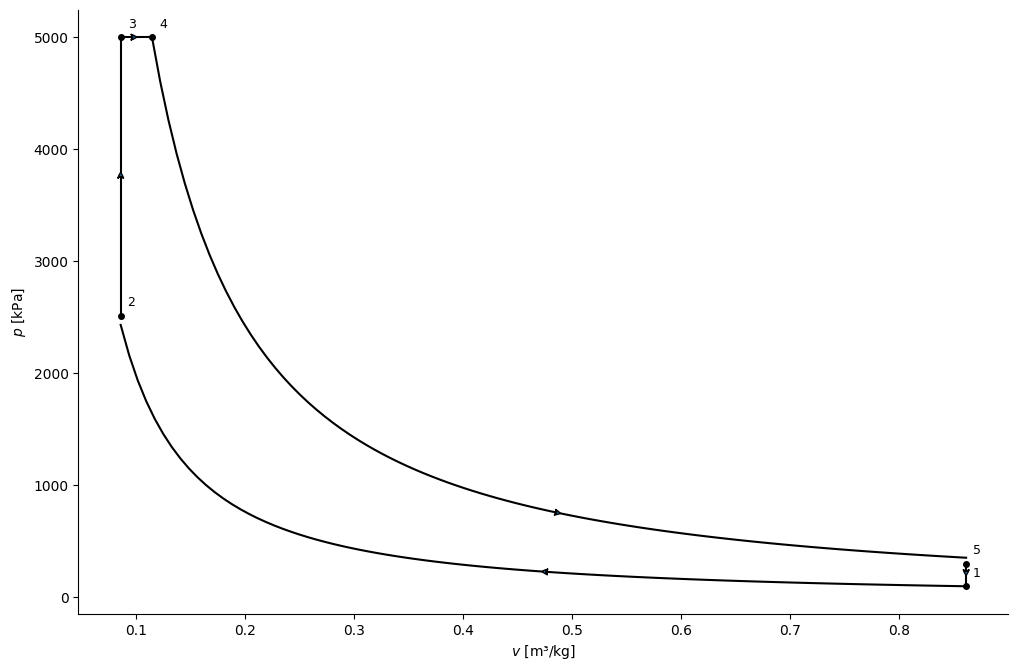

In [11]:
from math import log

# Add entropy to the property table
states.add_property('s',units='kJ/kg/K')
s = states.dict['s']

pv = air.pv_diagram()

s[1] = air.s(T=T[1],p=p[1])
for i in [2,3,4,5]:
    #s[i] = s[1] + c_p*log(T[i]/T[1]) - R*log(p[i]/p[1])
    s[i] = air.s(T=T[i],p=p[i])

# plot each state on the p,v diagram and calculate the entropy at each state
for i in range(1,6):
    pv.plot_state(states[i],label_loc='north east')

# plot the process paths
pv.plot_process(states[1],states[2],path='isentropic')
pv.plot_process(states[2],states[3],path='isochoric')
pv.plot_process(states[3],states[4],path='isobaric')
pv.plot_process(states[4],states[5],path='isentropic')
pv.plot_process(states[5],states[1],path='isochoric');

#### (b) $T$-$s$ diagram
**Note: the isentropic lines are not vertical in this diagram because the entropies were 
calculated for variable specific heat**, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the skewed shape of the cycle on the $T$-$s$ diagram.

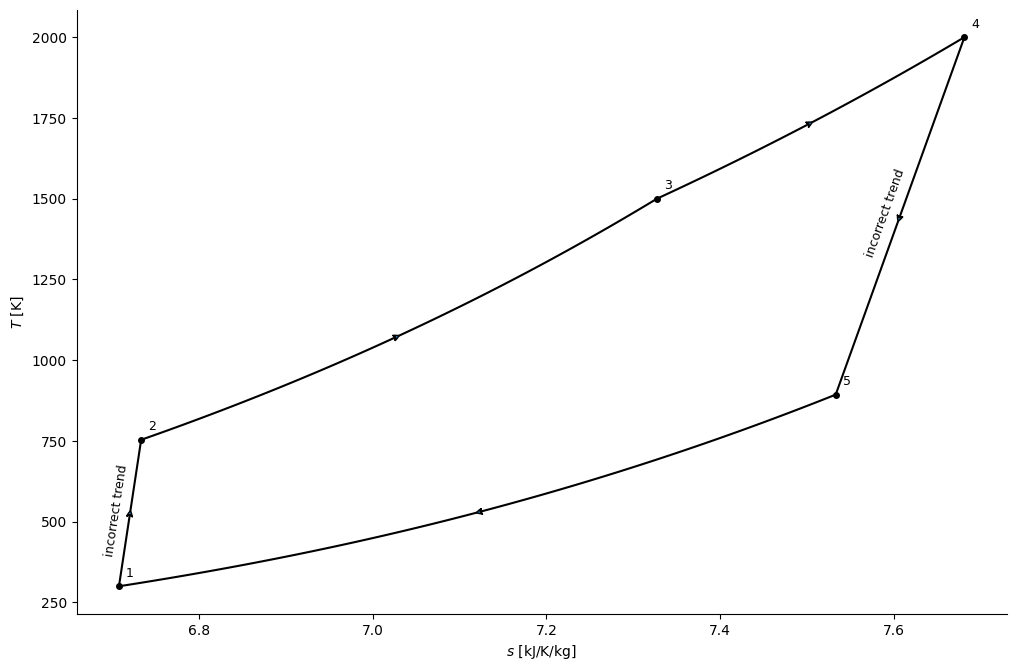

In [12]:
Ts = air.Ts_diagram()

for i in range(1,6):
    Ts.plot_state(states[i],label_loc='north east')
  
 
Ts.plot_process(states[1],states[2],label='incorrect trend',path='isentropic')
Ts.plot_process(states[2],states[3],path='isochoric')
Ts.plot_process(states[3],states[4],path='isobaric')
Ts.plot_process(states[4],states[5],label='incorrect trend',path='isentropic')
Ts.plot_process(states[5],states[1],path='isochoric');

In [13]:
Summary();

<IPython.core.display.Latex object>

,T,p,v,s
unit,K,kPa,m³/kg,kJ/K/kg
1,300.000000,100.000000,0.861158,6.707700
2,753.521630,2511.738765,0.086116,6.733272
3,1500.000000,5000.000000,0.086116,7.327372
4,2000.000000,5000.000000,0.114821,7.681485
5,893.362734,297.787578,0.861158,7.533244


In [14]:
Summary(['r_c','q_in','w_net','eta_th','MEP']);

<IPython.core.display.Latex object>